<a href="https://colab.research.google.com/github/Harshit50/Keyword-Co-Occurrence-Network-Analysis/blob/main/Project3_Harshit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
import community

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FDA/Project_3
!ls -lrth

Mounted at /content/drive
/content/drive/MyDrive/FDA/Project_3
total 11M
-rw------- 1 root root 1.7M Apr  2 22:26 data_2020.xls
-rw------- 1 root root 2.1M Apr  2 22:27 data_2021.xls
-rw------- 1 root root 2.1M Apr  2 22:27 data_2022.xls
-rw------- 1 root root 2.0M Apr  2 22:28 data_2023.xls
-rw------- 1 root root 1.9M Apr  2 22:28 data_2024.xls
-rw------- 1 root root 666K Apr  3 19:50 processed_data_2024.xlsx
-rw------- 1 root root 684K Apr  3 19:57 clustered_keywords_data.xlsx
-rw------- 1 root root  37K Apr  3 19:58 keyword_clusters.xlsx


In [ ]:
df_2020 = pd.read_excel('data_2020.xls')
df_2021 = pd.read_excel('data_2021.xls')
df_2022 = pd.read_excel('data_2022.xls')
df_2023 = pd.read_excel('data_2023.xls')
df_2024 = pd.read_excel('data_2024.xls')

# Keyword Analysis for the year 2020

## Auhtor Keywords for 2020

In [ ]:
import re

author_keywords_2020 = df_2020['Author Keywords']

author_keywords_2020 = author_keywords_2020.astype(str).str.lower()

keyword_lists_2020 = author_keywords_2020.str.split(';').apply(lambda x: [kw.strip() for kw in x if kw.strip()])
keyword_lists_2020 = keyword_lists_2020.apply(lambda x: [re.sub(r'\(\s*[^)]+\s*\)', '', kw) for kw in x])
keyword_lists_2020

,Author Keywords
0,"[human-ai interaction, generative deep neural ..."
1,"[generative modelling, artificial intelligence..."
2,"[artificial intelligence, generative art, live..."
3,"[ai , amyloid imaging, cad ]"
4,"[conditional generative adversarial networks, ..."
...,...
421,"[social robot, domestic, personalization, desi..."
422,"[incremental model evaluation, bidirectional r..."
423,[nan]
424,[nan]


## Creating co-occurrences

In [ ]:
def calculate_co_occurrences(keyword_lists):

  co_occurrences = {}
  for keywords in keyword_lists:
    for pair in combinations(set(keywords), 2):
      co_occurrences[pair] = co_occurrences.get(pair, 0) + 1
  return co_occurrences

In [ ]:
co_occurrences_2020 = calculate_co_occurrences(keyword_lists_2020)
co_occurrences_2020

{('generative deep neural networks', 'co-creation'): 1,
 ('generative deep neural networks', 'human-ai interaction'): 1,
 ('co-creation', 'human-ai interaction'): 1,
 ('user experience', 'artificial intelligence'): 1,
 ('user experience', 'collaboration'): 1,
 ('user experience', 'generative modelling'): 1,
 ('user experience', 'generative design'): 1,
 ('user experience', 'creativity'): 1,
 ('artificial intelligence', 'collaboration'): 1,
 ('artificial intelligence', 'generative modelling'): 1,
 ('artificial intelligence', 'generative design'): 1,
 ('artificial intelligence', 'creativity'): 2,
 ('collaboration', 'generative modelling'): 1,
 ('collaboration', 'generative design'): 1,
 ('collaboration', 'creativity'): 1,
 ('generative modelling', 'generative design'): 1,
 ('generative modelling', 'creativity'): 1,
 ('generative design', 'creativity'): 1,
 ('artificial intelligence', 'generative music'): 2,
 ('artificial intelligence', 'generative art'): 2,
 ('artificial intelligence', '

## Creating Keyword co-occurence network

In [ ]:
def visualize_keyword_co_occurrences(co_occurrences, top_n=50):

  G = nx.Graph()
  for (kw1, kw2), weight in co_occurrences.items():
    G.add_edge(kw1, kw2, weight=weight)

  centrality = nx.degree_centrality(G)
  top_keywords = sorted(centrality, key=centrality.get, reverse=True)[:top_n]

  G_top = G.subgraph(top_keywords)

  plt.figure(figsize=(12, 8))
  pos = nx.kamada_kawai_layout(G_top)
  edges = G_top.edges(data=True)
  weights = [edata['weight'] for _, _, edata in edges]

  nx.draw(G_top, pos, with_labels=True, node_size=500,
          font_size=10, edge_color=weights,
          width=[w / 2 for w in weights], cmap=plt.cm.Blues)

  labels = nx.get_edge_attributes(G_top, 'weight')
  nx.draw_networkx_edge_labels(G_top, pos, edge_labels=labels)

  plt.title("Keyword Co-occurrence Network")
  plt.show()

  edges_data = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
  edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])
  edges_df_sorted = edges_df.sort_values(by='Weight', ascending=False)
  return edges_df_sorted, G

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


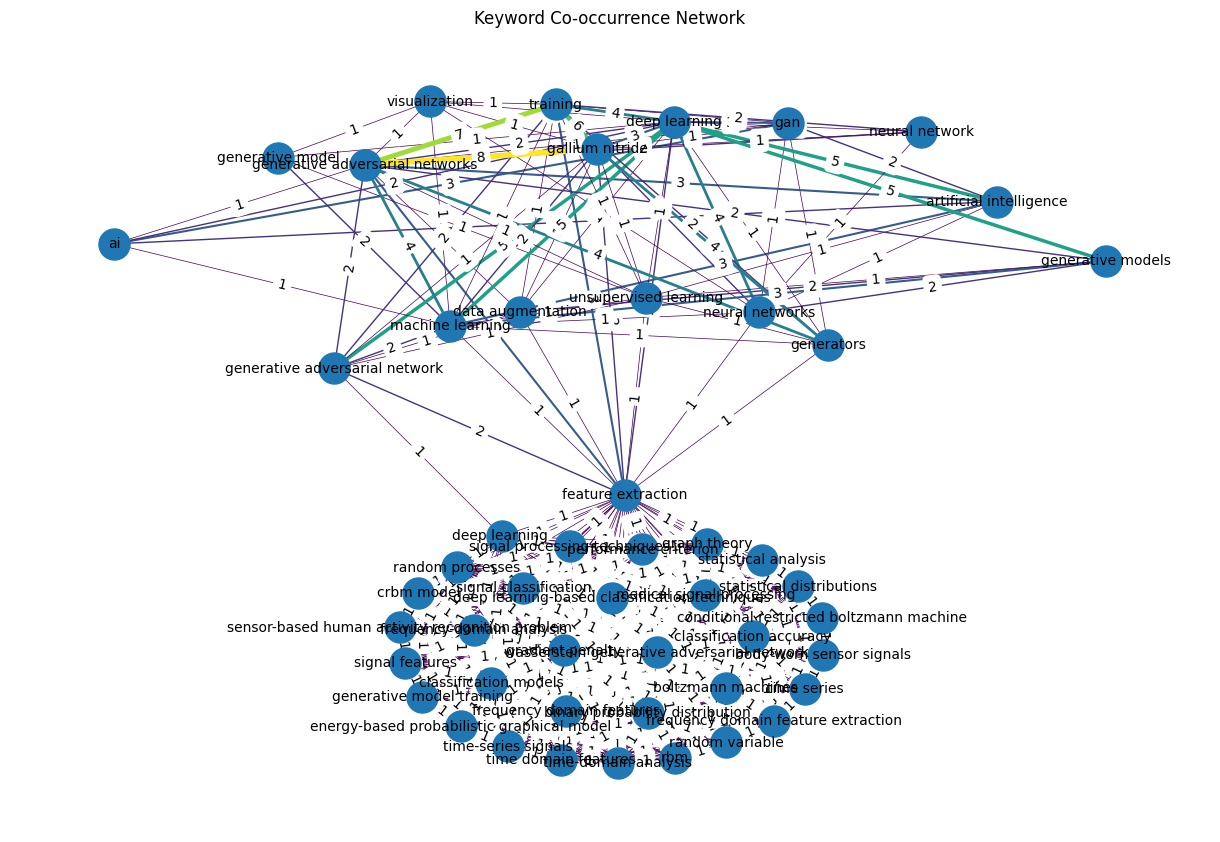

                               Source                                 Target  \
264   generative adversarial networks                        gallium nitride   
262   generative adversarial networks                               training   
1399                         training                        gallium nitride   
690                     deep learning         generative adversarial network   
657                     deep learning                       machine learning   
...                               ...                                    ...   
1493                  gallium nitride  text-independent speaker verification   
1492                  gallium nitride                      data augmentation   
1491                  gallium nitride               variational auto-encoder   
1490                  gallium nitride                    speaker recognition   
1498                  gallium nitride                      anomaly detection   

      Weight  
264        8  
262      

In [ ]:
edges_df_sorted_2020, G = visualize_keyword_co_occurrences(co_occurrences_2020)
print(edges_df_sorted_2020)

## Getting the degree of node

In [ ]:
node_degrees_20 = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted_20 = sorted(node_degrees_20.items(), key=lambda x: x[1], reverse=True)

node_degrees_sorted_20

[('generative adversarial networks', 227),
 ('deep learning', 217),
 ('machine learning', 106),
 ('artificial intelligence', 105),
 ('generative adversarial network', 96),
 ('training', 92),
 ('gan', 83),
 ('gallium nitride', 70),
 ('feature extraction', 69),
 ('generative models', 67),
 ('neural networks', 59),
 ('ai', 51),
 ('generative model', 41),
 ('data augmentation', 41),
 ('unsupervised learning', 37),
 ('deep learning ', 36),
 ('time series', 35),
 ('neural network', 34),
 ('visualization', 34),
 ('body-worn sensor signals', 32),
 ('medical signal processing', 32),
 ('statistical distributions', 32),
 ('frequency domain features', 32),
 ('conditional restricted boltzmann machine', 32),
 ('statistical analysis', 32),
 ('graph theory', 32),
 ('deep learning-based classification techniques', 32),
 ('signal classification', 32),
 ('performance criterion', 32),
 ('signal processing techniques', 32),
 ('crbm model', 32),
 ('sensor-based human activity recognition problem', 32),
 ('r

## Avg strength vs Degree for each node

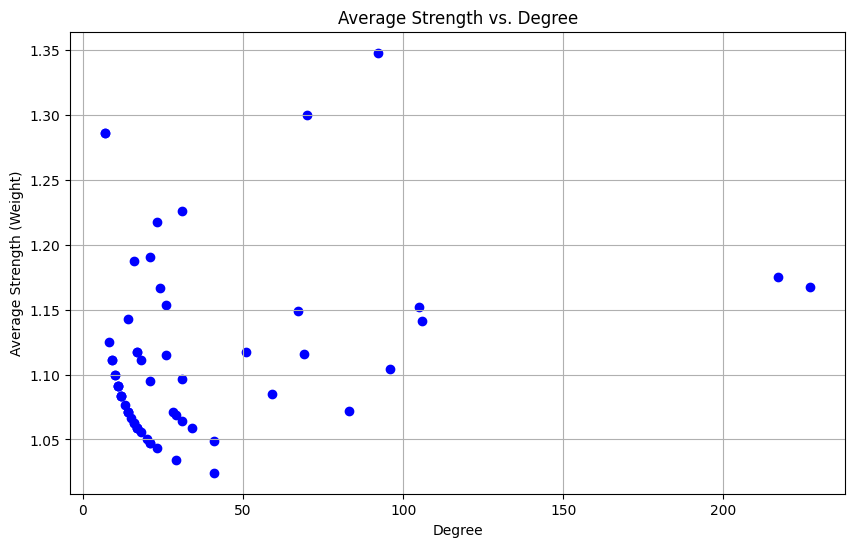

In [ ]:
average_strength_20 = {node: 0 for node in G.nodes()}
for node in G.nodes():
    total_weight_20 = sum([attr['weight'] for _, _, attr in G.edges(node, data=True)])
    average_strength_20[node] = total_weight_20 / G.degree(node)

filtered_nodes_20 = [node for node in G.nodes() if average_strength_20[node] != 1]

# Extracting degree and average strength
degrees_20 = [G.degree(node) for node in filtered_nodes_20]
average_strengths_20 = [average_strength_20[node] for node in filtered_nodes_20]

plt.figure(figsize=(10, 6))
plt.scatter(degrees_20, average_strengths_20, color='blue')
plt.title("Average Strength vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Strength (Weight)")
plt.grid(True)
plt.show()


## Node strength

In [ ]:
node_strengths_20 = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

filtered_node_strengths_20 = {node: strength for node, strength in node_strengths_20.items() if strength > 1}

node_strengths_sorted_20 = sorted(filtered_node_strengths_20.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(node_strengths_sorted_20, columns=['Node', 'Strength'])

,Node,Strength
0,generative adversarial networks,265
1,deep learning,255
2,training,124
3,artificial intelligence,121
4,machine learning,121
...,...,...
1037,fine-tuning,2
1038,fake image detection,2
1039,incremental model evaluation,2
1040,bidirectional relations,2


# Keyword analysis for the year 2021

## Auhtor Keywords for 2021

In [ ]:
import re

author_keywords_2021 = df_2021['Author Keywords']

author_keywords_2021 = author_keywords_2021.astype(str).str.lower()

keyword_lists_2021 = author_keywords_2021.str.split(';').apply(lambda x: [kw.strip() for kw in x if kw.strip()])
keyword_lists_2021 = keyword_lists_2021.apply(lambda x: [re.sub(r'\(\s*[^)]+\s*\)', '', kw) for kw in x])
keyword_lists_2021

,Author Keywords
0,"[generative modelling, artificial intelligence..."
1,"[machine learning, human-ai co-creation, music..."
2,"[neural machine translation, nmt, generative a..."
3,"[generative machine learning, ai education, ge..."
4,"[generative art, style transfer, biases, ai, s..."
...,...
495,"[multi-task learning, adversarial autoencoder,..."
496,"[license plate recognition, attention mechanis..."
497,[nan]
498,[nan]


## Creating co-*occurrences*

In [ ]:
co_occurrences_2021 = calculate_co_occurrences(keyword_lists_2021)
co_occurrences_2021

{('user experience', 'artificial intelligence'): 1,
 ('user experience', 'collaboration'): 1,
 ('user experience', 'generative modelling'): 1,
 ('user experience', 'generative design'): 1,
 ('user experience', 'creativity'): 1,
 ('artificial intelligence', 'collaboration'): 1,
 ('artificial intelligence', 'generative modelling'): 1,
 ('artificial intelligence', 'generative design'): 2,
 ('artificial intelligence', 'creativity'): 1,
 ('collaboration', 'generative modelling'): 1,
 ('collaboration', 'generative design'): 1,
 ('collaboration', 'creativity'): 1,
 ('generative modelling', 'generative design'): 1,
 ('generative modelling', 'creativity'): 1,
 ('generative design', 'creativity'): 1,
 ('music composition', 'machine learning'): 1,
 ('music composition', 'human-ai co-creation'): 1,
 ('machine learning', 'human-ai co-creation'): 1,
 ('imperfect ai', 'neural machine translation'): 1,
 ('imperfect ai', 'application modernization'): 1,
 ('imperfect ai', 'code translation'): 1,
 ('impe

## Creating Keyword co-occurence network

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


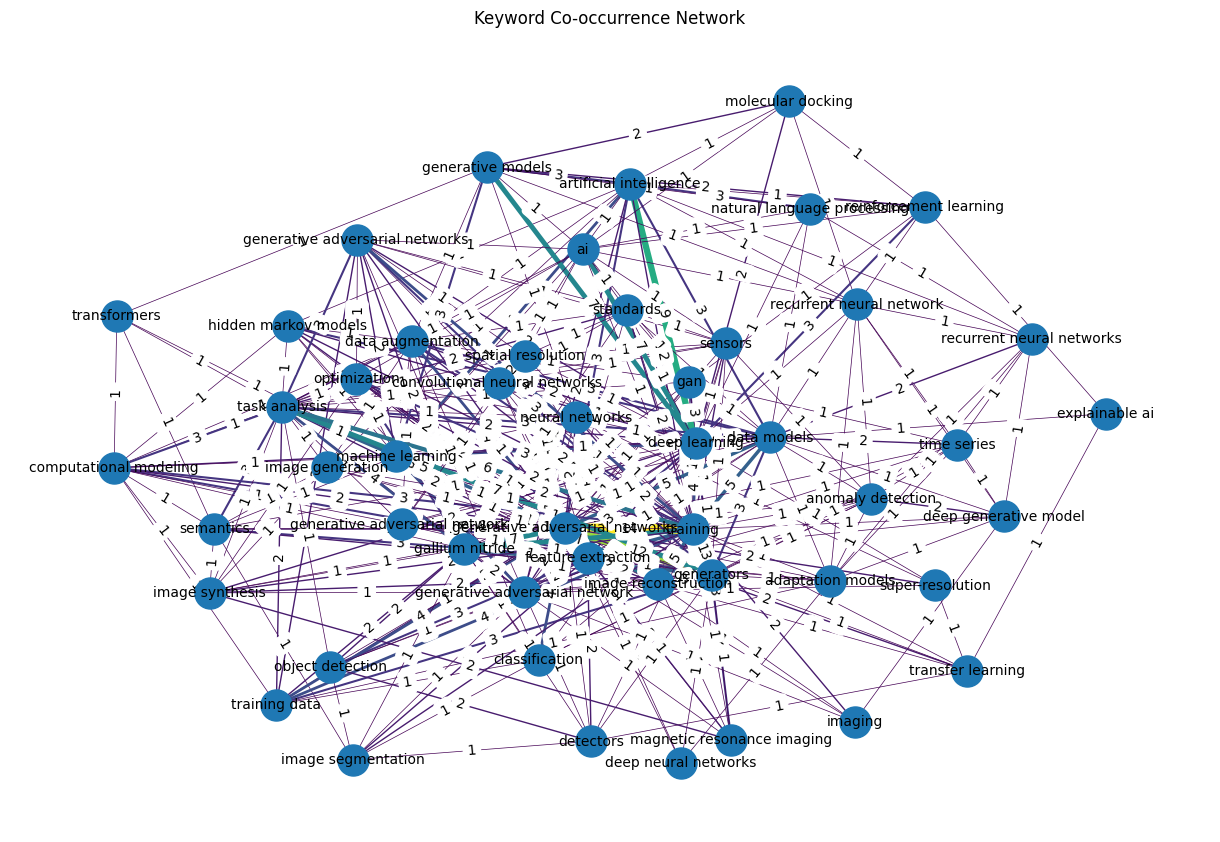

                               Source                               Target  \
343   generative adversarial networks                             training   
1679                       generators                             training   
353   generative adversarial networks                           generators   
18            artificial intelligence                        deep learning   
2002                         training                      gallium nitride   
...                               ...                                  ...   
1644                adaptation models                           generators   
1643               feature extraction                   linear programming   
1642               feature extraction        convolutional neural network    
1641               feature extraction  hyperspectral image  classification   
1649                adaptation models                        image texture   

      Weight  
343       14  
1679      13  
353       12  
18 

In [ ]:
edges_df_sorted_2021, G = visualize_keyword_co_occurrences(co_occurrences_2021)
print(edges_df_sorted_2021)

## Getting the degree of node

In [ ]:
node_degrees_21 = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted_21 = sorted(node_degrees_21.items(), key=lambda x: x[1], reverse=True)

node_degrees_sorted_21

[('generative adversarial networks', 236),
 ('deep learning', 222),
 ('generative adversarial network', 161),
 ('artificial intelligence', 152),
 ('training', 150),
 ('generators', 105),
 ('machine learning', 103),
 ('feature extraction', 94),
 ('task analysis', 94),
 ('data models', 76),
 ('ai', 72),
 ('gan', 65),
 ('generative models', 63),
 ('gallium nitride', 62),
 ('image reconstruction', 52),
 ('semantics', 50),
 ('generative adversarial networks ', 44),
 ('computational modeling', 42),
 ('data augmentation', 40),
 ('generative adversarial network ', 39),
 ('classification', 38),
 ('training data', 37),
 ('optimization', 35),
 ('neural networks', 32),
 ('anomaly detection', 29),
 ('adaptation models', 27),
 ('natural language processing', 27),
 ('recurrent neural networks', 27),
 ('explainable ai', 26),
 ('detectors', 26),
 ('image generation', 26),
 ('reinforcement learning', 25),
 ('image synthesis', 25),
 ('standards', 25),
 ('hidden markov models', 24),
 ('transfer learning',

## Avg strength vs Degree for each node

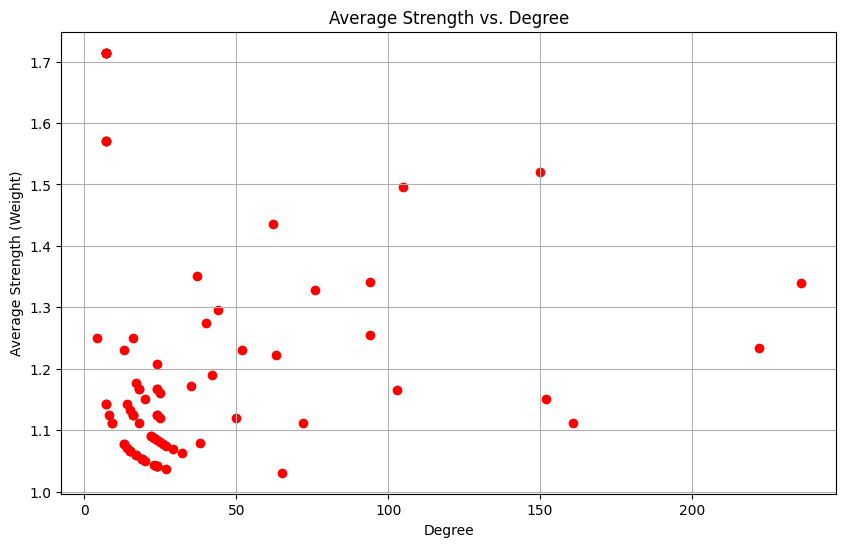

In [ ]:
average_strength_21 = {node: 0 for node in G.nodes()}
for node in G.nodes():
    total_weight_21 = sum([attr['weight'] for _, _, attr in G.edges(node, data=True)])
    average_strength_21[node] = total_weight_21 / G.degree(node)

filtered_nodes_21 = [node for node in G.nodes() if average_strength_21[node] != 1]

degrees_21 = [G.degree(node) for node in filtered_nodes_21]
average_strengths_21 = [average_strength_21[node] for node in filtered_nodes_21]

plt.figure(figsize=(10, 6))
plt.scatter(degrees_21, average_strengths_21, color='red')
plt.title("Average Strength vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Strength (Weight)")
plt.grid(True)
plt.show()

## Node strength

In [ ]:
node_strengths_21 = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

filtered_node_strengths_21 = {node: strength for node, strength in node_strengths_21.items() if strength > 1}

node_strengths_sorted_21 = sorted(filtered_node_strengths_21.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(node_strengths_sorted_21, columns=['Node', 'Strength'])

,Node,Strength
0,generative adversarial networks,316
1,deep learning,274
2,training,228
3,generative adversarial network,179
4,artificial intelligence,175
...,...,...
1091,adversarial temporal generation,2
1092,semi-supervised learning,2
1093,ionosphere,2
1094,tec forecasting,2


# Keyword analysis for the year 2022

## Auhtor Keywords for 2022

In [ ]:
author_keywords_2022 = df_2022['Author Keywords']

author_keywords_2022 = author_keywords_2022.astype(str).str.lower()

keyword_lists_2022 = author_keywords_2022.str.split(';').apply(lambda x: [kw.strip() for kw in x if kw.strip()])
keyword_lists_2022 = keyword_lists_2022.apply(lambda x: [re.sub(r'\(\s*[^)]+\s*\)', '', kw) for kw in x])
keyword_lists_2022

,Author Keywords
0,"[generative ai, design, bias, uncertainty]"
1,"[generative ai, software engineering tooling, ..."
2,"[visual programming environment, generative co..."
3,"[generative modelling, artificial intelligence..."
4,"[generative design, digital manufacturing, top..."
...,...
495,"[deep learning, label-free microscopy, slide-f..."
496,"[uncertainty quantification, channel reservoir..."
497,"[faces, three-dimensional displays, dynamics, ..."
498,[nan]


## Creating co-occurrences

In [ ]:
co_occurrences_2022 = calculate_co_occurrences(keyword_lists_2022)
co_occurrences_2022

{('uncertainty', 'design'): 1,
 ('uncertainty', 'generative ai'): 1,
 ('uncertainty', 'bias'): 1,
 ('design', 'generative ai'): 1,
 ('design', 'bias'): 1,
 ('generative ai', 'bias'): 1,
 ('explainable ai', 'scenario based design'): 1,
 ('explainable ai', 'human-centered ai'): 1,
 ('explainable ai', 'generative ai'): 1,
 ('explainable ai', 'software engineering tooling'): 1,
 ('scenario based design', 'human-centered ai'): 1,
 ('scenario based design', 'generative ai'): 1,
 ('scenario based design', 'software engineering tooling'): 1,
 ('human-centered ai', 'generative ai'): 1,
 ('human-centered ai', 'software engineering tooling'): 1,
 ('generative ai', 'software engineering tooling'): 1,
 ('generative conversational ai', 'comics'): 1,
 ('generative conversational ai', 'coding strip'): 1,
 ('generative conversational ai', 'visual programming environment'): 1,
 ('comics', 'coding strip'): 1,
 ('comics', 'visual programming environment'): 1,
 ('coding strip', 'visual programming environm

## Creating Keyword co-occurence network

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


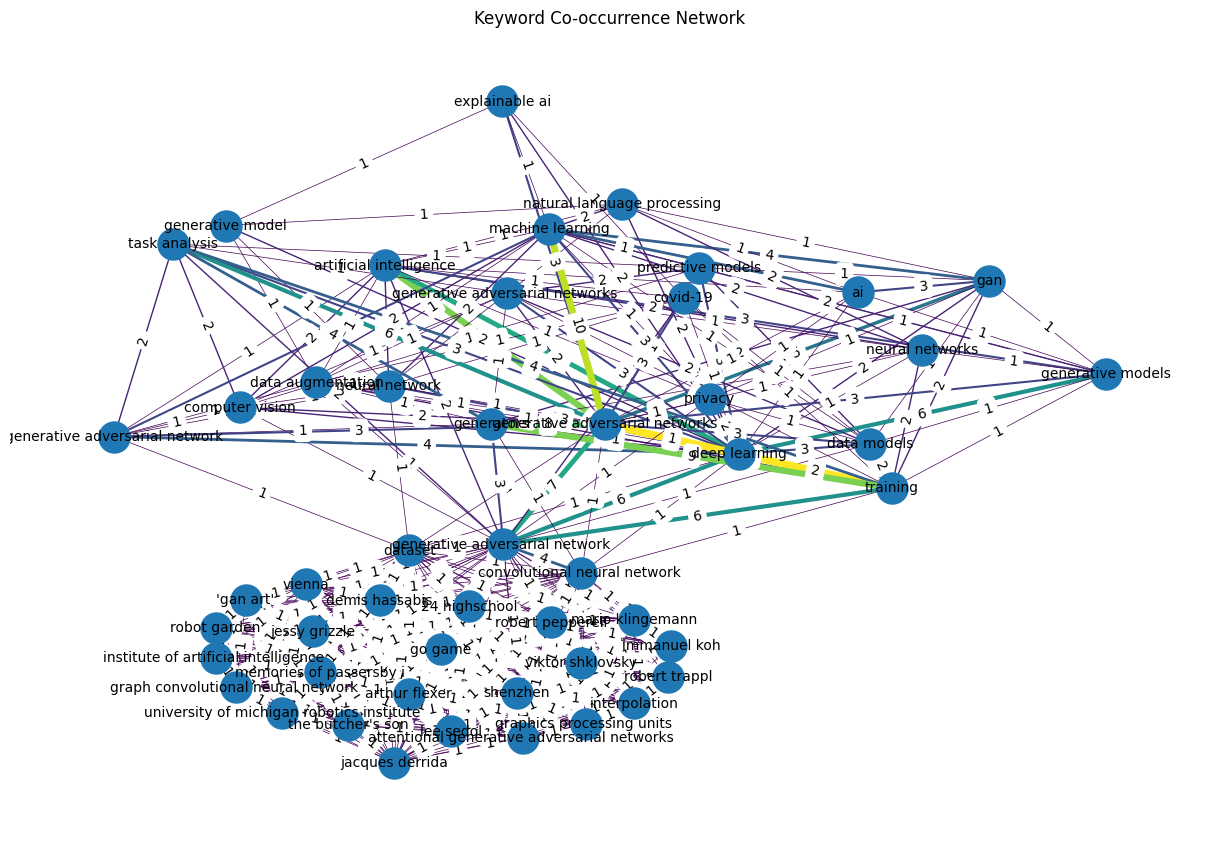

                               Source                           Target  Weight
833   generative adversarial networks                         training      11
427                  machine learning  generative adversarial networks      10
113           artificial intelligence  generative adversarial networks       9
2291                       generators                         training       9
744   generative adversarial networks                       generators       8
...                               ...                              ...     ...
2510                generative models               federated learning       1
2509                generative models               privacy preserving       1
2508                generative models       neuro-symbolic integration       1
2507                generative models             cross-modal learning       1
2520                generative models      learning with disagreements       1

[7294 rows x 3 columns]


In [ ]:
edges_df_sorted_2022, G = visualize_keyword_co_occurrences(co_occurrences_2022)
print(edges_df_sorted_2022)

## Getting the degree of node

In [ ]:
node_degrees_22 = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted_22 = sorted(node_degrees_22.items(), key=lambda x: x[1], reverse=True)

node_degrees_sorted_22

[('generative adversarial networks', 378),
 ('deep learning', 278),
 ('artificial intelligence', 198),
 ('generative adversarial network ', 189),
 ('machine learning', 159),
 ('generative adversarial network', 154),
 ('training', 120),
 ('gan', 85),
 ('generators', 80),
 ('generative models', 78),
 ('task analysis', 75),
 ('data augmentation', 66),
 ('ai', 64),
 ('dataset', 64),
 ('covid-19', 63),
 ('jacques derrida', 61),
 ('generative adversarial networks ', 60),
 ('convolutional neural network ', 60),
 ('computer vision', 54),
 ('data models', 51),
 ('predictive models', 47),
 ('neural networks', 46),
 ('neural network', 46),
 ('natural language processing', 45),
 ('explainable ai', 42),
 ('generative model', 42),
 ('privacy', 37),
 ('viktor shklovsky', 37),
 ('interpolation', 37),
 ('robert trappl', 37),
 ('mario klingemann', 37),
 ('immanuel koh', 37),
 ('go game', 37),
 ('jessy grizzle', 37),
 ("'gan art'", 37),
 ('vienna', 37),
 ('robot garden', 37),
 ('demis hassabis', 37),
 ('

## Avg strength vs Degree for each node

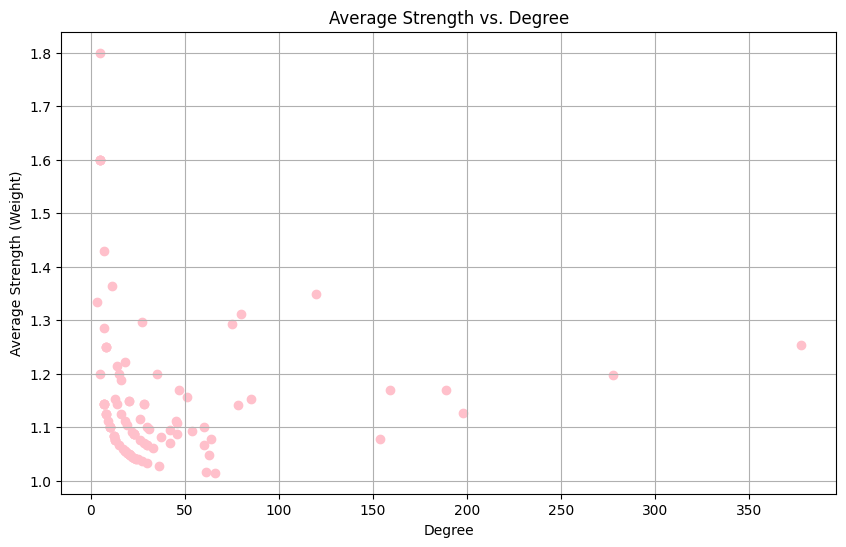

In [ ]:
average_strength_22 = {node: 0 for node in G.nodes()}
for node in G.nodes():
    total_weight_22 = sum([attr['weight'] for _, _, attr in G.edges(node, data=True)])
    average_strength_22[node] = total_weight_22 / G.degree(node)

filtered_nodes_22 = [node for node in G.nodes() if average_strength_22[node] != 1]

degrees_22 = [G.degree(node) for node in filtered_nodes_22]
average_strengths_22 = [average_strength_22[node] for node in filtered_nodes_22]

plt.figure(figsize=(10, 6))
plt.scatter(degrees_22, average_strengths_22, color='pink')
plt.title("Average Strength vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Strength (Weight)")
plt.grid(True)
plt.show()

## Node strength

In [ ]:
node_strengths_22 = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

filtered_node_strengths_22 = {node: strength for node, strength in node_strengths_22.items() if strength > 1}

node_strengths_sorted_22 = sorted(filtered_node_strengths_22.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(node_strengths_sorted_22, columns=['Node', 'Strength'])

,Node,Strength
0,generative adversarial networks,474
1,deep learning,333
2,artificial intelligence,223
3,generative adversarial network,221
4,machine learning,186
...,...,...
1444,motion generation,2
1445,human-object interaction,2
1446,whole-body grasping synthesis,2
1447,zero-shot classification,2


# Keyword analysis for the year 2023

## Auhtor Keywords for 2023

In [ ]:
author_keywords_2023 = df_2023['Author Keywords']

author_keywords_2023 = author_keywords_2023.astype(str).str.lower()

keyword_lists_2023 = author_keywords_2023.str.split(';').apply(lambda x: [kw.strip() for kw in x if kw.strip()])
keyword_lists_2023 = keyword_lists_2023.apply(lambda x: [re.sub(r'\(\s*[^)]+\s*\)', '', kw) for kw in x])
keyword_lists_2023

,Author Keywords
0,"[hci, ai, generative ai, human-ai interaction]"
1,"[generative ai, learning, education, personas,..."
2,"[legal, law, explainable ai, blockchain, gener..."
3,"[ai governance, ai regulation, generative ai, ..."
4,"[speculative design, generative ai, creativity..."
...,...
495,"[artificial intelligence, cancer stem cell, ce..."
496,"[generative model, urban flow, knowledge graph..."
497,[nan]
498,[nan]


## Creating Co-occurrences Pairs

In [ ]:
co_occurrences_2023 = calculate_co_occurrences(keyword_lists_2023)
co_occurrences_2023

{('ai', 'generative ai'): 8,
 ('ai', 'hci'): 1,
 ('ai', 'human-ai interaction'): 2,
 ('generative ai', 'hci'): 1,
 ('generative ai', 'human-ai interaction'): 5,
 ('hci', 'human-ai interaction'): 1,
 ('personas', 'education'): 3,
 ('personas', 'learning'): 2,
 ('personas', 'conversational ai'): 2,
 ('personas', 'generative ai'): 2,
 ('education', 'learning'): 2,
 ('education', 'conversational ai'): 2,
 ('education', 'generative ai'): 6,
 ('learning', 'conversational ai'): 2,
 ('learning', 'generative ai'): 3,
 ('conversational ai', 'generative ai'): 2,
 ('explainable ai', 'law'): 1,
 ('explainable ai', 'legal'): 1,
 ('explainable ai', 'responsible ai'): 1,
 ('explainable ai', 'blockchain'): 1,
 ('explainable ai', 'generative ai'): 2,
 ('law', 'legal'): 1,
 ('law', 'responsible ai'): 1,
 ('law', 'blockchain'): 1,
 ('law', 'generative ai'): 1,
 ('legal', 'responsible ai'): 1,
 ('legal', 'blockchain'): 1,
 ('legal', 'generative ai'): 1,
 ('responsible ai', 'blockchain'): 1,
 ('responsible 

## Creating Keyword co-occurence network

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


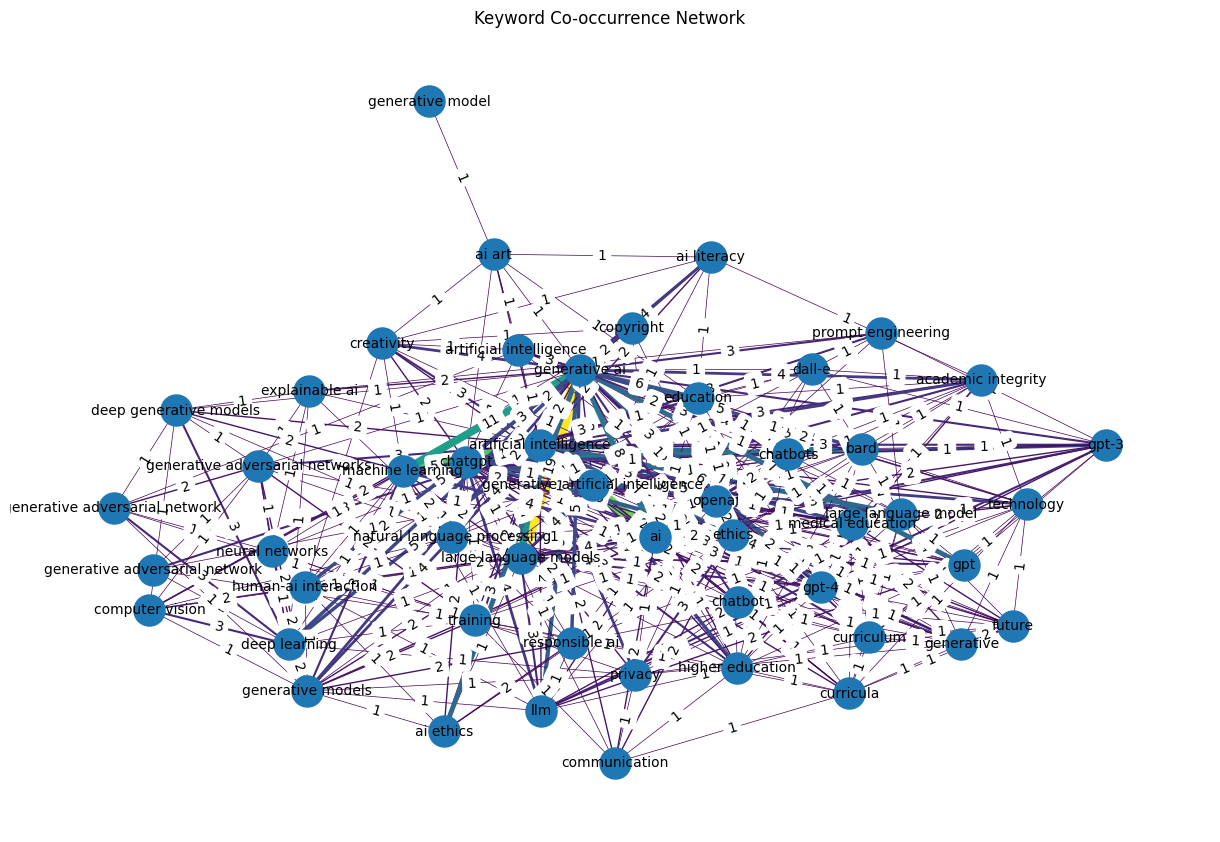

                       Source                              Target  Weight
156             generative ai               large language models      19
11                         ai             artificial intelligence      15
2157  artificial intelligence                    machine learning      14
268             generative ai                    machine learning      11
986     large language models             artificial intelligence      10
...                       ...                                 ...     ...
2488  artificial intelligence                         qualitative       1
2487  artificial intelligence                            analysis       1
2486  artificial intelligence                      microsoft bing       1
2485  artificial intelligence  generative pretrained transformers       1
2498  artificial intelligence              technology integration       1

[7054 rows x 3 columns]


In [ ]:
edges_df_sorted_2023, G = visualize_keyword_co_occurrences(co_occurrences_2023)
print(edges_df_sorted_2023)

## Getting the degree of node

In [ ]:
node_degrees_23 = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted_23 = sorted(node_degrees_23.items(), key=lambda x: x[1], reverse=True)

node_degrees_sorted_23

[('generative ai', 614),
 ('artificial intelligence', 456),
 ('chatgpt', 413),
 ('ai', 145),
 ('generative artificial intelligence', 138),
 ('large language models', 137),
 ('machine learning', 124),
 ('generative adversarial networks', 105),
 ('generative models', 100),
 ('deep learning', 86),
 ('large language model', 79),
 ('ethics', 77),
 ('gpt-4', 74),
 ('artificial intelligence ', 72),
 ('openai', 70),
 ('chatbots', 67),
 ('education', 66),
 ('gpt-3', 57),
 ('training', 57),
 ('medical education', 57),
 ('creativity', 56),
 ('llm', 51),
 ('higher education', 50),
 ('gpt', 50),
 ('generative model', 49),
 ('academic integrity', 48),
 ('bard', 47),
 ('generative', 46),
 ('ai ethics', 45),
 ('generative adversarial network', 45),
 ('explainable ai', 42),
 ('natural language processing', 41),
 ('privacy', 41),
 ('human-ai interaction', 39),
 ('technology', 39),
 ('chatbot', 39),
 ('computer vision', 38),
 ('curriculum', 38),
 ('responsible ai', 37),
 ('prompt engineering', 36),
 ('da

## Avg strength vs Degree for each node

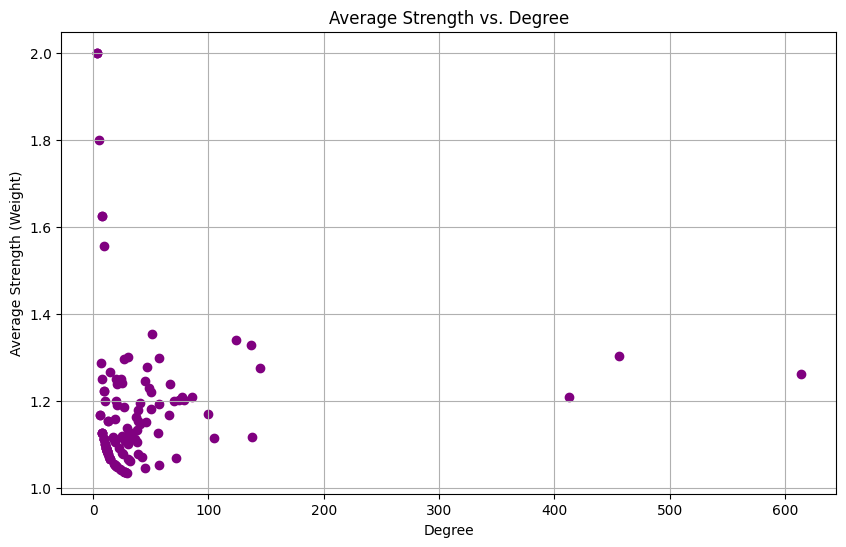

In [ ]:
average_strength_23 = {node: 0 for node in G.nodes()}
for node in G.nodes():
    total_weight_23 = sum([attr['weight'] for _, _, attr in G.edges(node, data=True)])
    average_strength_23[node] = total_weight_23 / G.degree(node)

filtered_nodes_23 = [node for node in G.nodes() if average_strength_23[node] != 1]

degrees_23 = [G.degree(node) for node in filtered_nodes_23]
average_strengths_23 = [average_strength_23[node] for node in filtered_nodes_23]

plt.figure(figsize=(10, 6))
plt.scatter(degrees_23, average_strengths_23, color='purple')
plt.title("Average Strength vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Strength (Weight)")
plt.grid(True)
plt.show()

## Node strength

In [ ]:
node_strengths_23 = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

filtered_node_strengths_23 = {node: strength for node, strength in node_strengths_23.items() if strength > 1}

node_strengths_sorted_23 = sorted(filtered_node_strengths_23.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(node_strengths_sorted_23, columns=['Node', 'Strength'])

,Node,Strength
0,generative ai,774
1,artificial intelligence,594
2,chatgpt,499
3,ai,185
4,large language models,182
...,...,...
1522,procedural modeling,2
1523,quality diversity,2
1524,time-series data,2
1525,score-based generative model,2


# Keyword Analysis for the year 2024

## Auhtor Keywords for 2024

In [ ]:
author_keywords_2024 = df_2024['Author Keywords']

author_keywords_2024 = author_keywords_2024.astype(str).str.lower()

keyword_lists_2024 = author_keywords_2024.str.split(';').apply(lambda x: [kw.strip() for kw in x if kw.strip()])
keyword_lists_2024 = keyword_lists_2024.apply(lambda x: [re.sub(r'\(\s*[^)]+\s*\)', '', kw) for kw in x])
keyword_lists_2024

,Author Keywords
0,"[generative ai, design principles, human-cente..."
1,"[large language model, chatglm, generative ai,..."
2,"[artificial intelligence, ai, ai literacy, alg..."
3,"[diffusion models, generative adversarial netw..."
4,"[generative ai, economic agents]"
...,...
495,"[engineering education 5.0, technology-enhance..."
496,[nan]
497,"[generative ai, self-directed learning, teache..."
498,"[automatic item generation, listening assessme..."


## Creating Co-occurrence Pairs

In [ ]:
co_occurrences_2024 = calculate_co_occurrences(keyword_lists_2024)
co_occurrences_2024

{('foundation models', 'generative ai'): 4,
 ('foundation models', 'human-centered ai'): 1,
 ('foundation models', 'design principles'): 1,
 ('generative ai', 'human-centered ai'): 1,
 ('generative ai', 'design principles'): 1,
 ('human-centered ai', 'design principles'): 1,
 ('chatglm', 'foundation model'): 1,
 ('chatglm', 'generative ai'): 1,
 ('chatglm', 'large language model'): 1,
 ('foundation model', 'generative ai'): 1,
 ('foundation model', 'large language model'): 1,
 ('generative ai', 'large language model'): 1,
 ('ai literacy', 'responsible ai'): 1,
 ('ai literacy', 'artificial intelligence'): 2,
 ('ai literacy', 'algorithmic literacy'): 1,
 ('ai literacy', 'ai'): 1,
 ('ai literacy', 'generative ai'): 7,
 ('responsible ai', 'artificial intelligence'): 1,
 ('responsible ai', 'algorithmic literacy'): 1,
 ('responsible ai', 'ai'): 1,
 ('responsible ai', 'generative ai'): 2,
 ('artificial intelligence', 'algorithmic literacy'): 1,
 ('artificial intelligence', 'ai'): 7,
 ('artifi

## Creating Keyword Co-occurrences Network

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


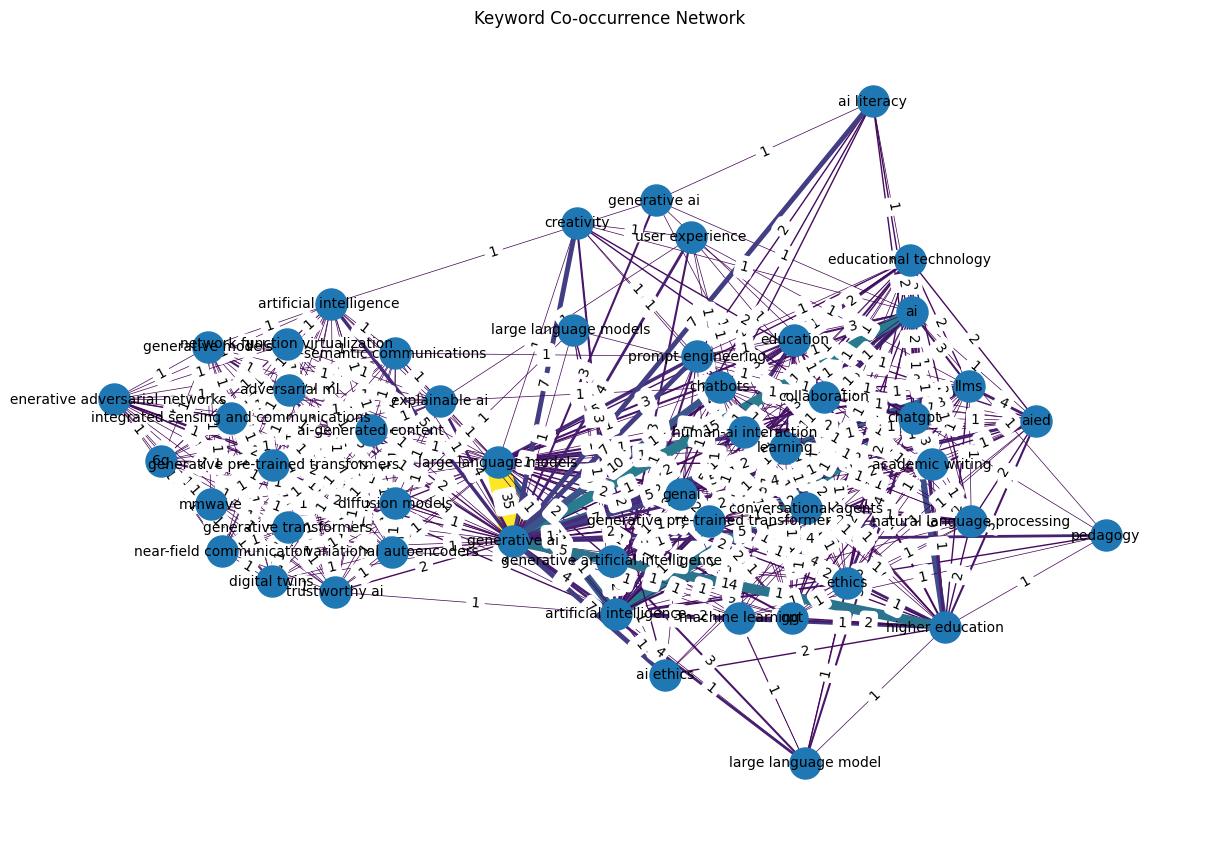

                       Source                      Target  Weight
91              generative ai       large language models      35
1411  artificial intelligence                     chatgpt      15
21              generative ai                          ai      15
35              generative ai            higher education      14
82              generative ai                        llms      12
...                       ...                         ...     ...
2389       prompt engineering     cognitive architectures       1
2388       prompt engineering              constructivism       1
2387       prompt engineering               crowdsourcing       1
2386       prompt engineering              ai-in-the-loop       1
2398       prompt engineering  behavior change techniques       1

[6748 rows x 3 columns]


In [ ]:
edges_df_sorted_2024, G = visualize_keyword_co_occurrences(co_occurrences_2024)
print(edges_df_sorted_2024)

## Getting the degree of node

In [ ]:
node_degrees_24 = {node: G.degree(node) for node in G.nodes()}
node_degrees_sorted_24 = sorted(node_degrees_24.items(), key=lambda x: x[1], reverse=True)

node_degrees_sorted_24

[('generative ai', 1270),
 ('chatgpt', 278),
 ('artificial intelligence', 257),
 ('large language models', 169),
 ('generative artificial intelligence', 112),
 ('ai', 99),
 ('education', 85),
 ('artificial intelligence ', 74),
 ('higher education', 69),
 ('ethics', 67),
 ('chatbots', 66),
 ('prompt engineering', 62),
 ('llms', 57),
 ('explainable ai', 54),
 ('learning', 49),
 ('genai', 48),
 ('ai ethics', 46),
 ('machine learning', 44),
 ('generative adversarial networks', 43),
 ('generative models', 43),
 ('large language models ', 42),
 ('gpt', 41),
 ('educational technology', 41),
 ('diffusion models', 40),
 ('human-ai interaction', 40),
 ('generative ai ', 40),
 ('user experience', 40),
 ('academic writing', 40),
 ('ai literacy', 38),
 ('6g', 38),
 ('creativity', 37),
 ('natural language processing', 37),
 ('generative pre-trained transformer', 37),
 ('variational autoencoders', 37),
 ('ai-generated content', 36),
 ('semantic communications', 36),
 ('trustworthy ai', 35),
 ('large 

## Avg strength vs Degree for each node

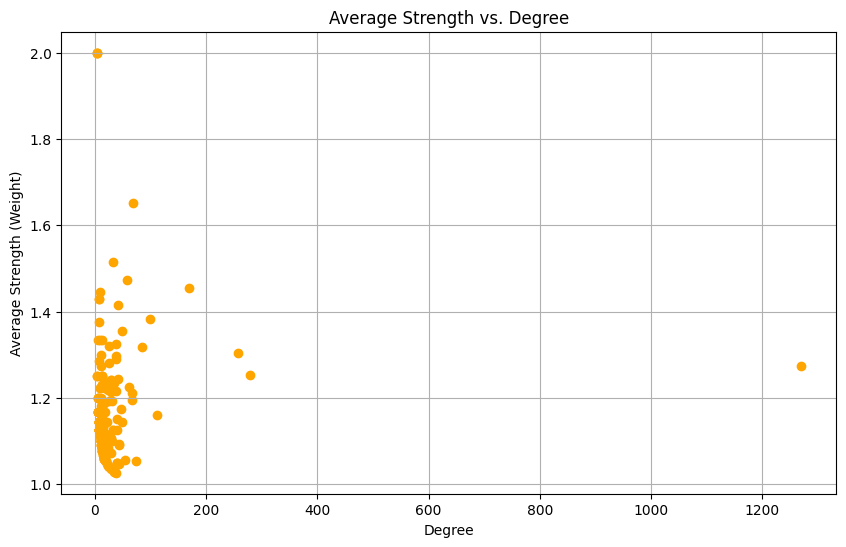

In [ ]:
average_strength_24 = {node: 0 for node in G.nodes()}
for node in G.nodes():
    total_weight_24 = sum([attr['weight'] for _, _, attr in G.edges(node, data=True)])
    average_strength_24[node] = total_weight_24 / G.degree(node)

filtered_nodes_24 = [node for node in G.nodes() if average_strength_24[node] != 1]

degrees_24 = [G.degree(node) for node in filtered_nodes_24]
average_strengths_24 = [average_strength_24[node] for node in filtered_nodes_24]

plt.figure(figsize=(10, 6))
plt.scatter(degrees_24, average_strengths_24, color='orange')
plt.title("Average Strength vs. Degree")
plt.xlabel("Degree")
plt.ylabel("Average Strength (Weight)")
plt.grid(True)
plt.show()

## Node strength

In [ ]:
node_strengths_24 = {node: sum(G[node][neighbor]['weight'] for neighbor in G[node]) for node in G.nodes()}

filtered_node_strengths_24 = {node: strength for node, strength in node_strengths_24.items() if strength > 1}

node_strengths_sorted_24 = sorted(filtered_node_strengths_24.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(node_strengths_sorted_24, columns=['Node', 'Strength'])

,Node,Strength
0,generative ai,1618
1,chatgpt,348
2,artificial intelligence,335
3,large language models,246
4,ai,137
...,...,...
1530,community-based research,2
1531,generative artifcial intelligence,2
1532,degeneration,2
1533,human-ai collaboration process,2


## Node vs strength 2020

In [ ]:
import plotly.express as px

top_20_nodes_20 = node_strengths_sorted_20[:20]

nodes = [node for node, strength in top_20_nodes_20]
strengths = [strength for node, strength in top_20_nodes_20]

fig = px.bar(x=nodes, y=strengths,
             labels={'x': 'Node (Keyword)', 'y': 'Strength'},
             title="Top 20 Keywords Strength")
fig.update_traces(marker_color='blue')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Node vs strength 2021

In [ ]:
top_20_nodes_21 = node_strengths_sorted_21[:20]

nodes = [node for node, strength in top_20_nodes_21]
strengths = [strength for node, strength in top_20_nodes_21]

fig = px.bar(x=nodes, y=strengths,
             labels={'x': 'Node (Keyword)', 'y': 'Strength'},
             title="Top 20 Keywords Strength")
fig.update_traces(marker_color='red')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Node vs strength 2022

In [ ]:
top_20_nodes_22 = node_strengths_sorted_22[:20]

nodes = [node for node, strength in top_20_nodes_22]
strengths = [strength for node, strength in top_20_nodes_22]

fig = px.bar(x=nodes, y=strengths,
             labels={'x': 'Node (Keyword)', 'y': 'Strength'},
             title="Top 20 Keywords Strength")
fig.update_traces(marker_color='pink')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Node vs strength 2023

In [ ]:
top_20_nodes_23 = node_strengths_sorted_23[:20]

nodes = [node for node, strength in top_20_nodes_23]
strengths = [strength for node, strength in top_20_nodes_23]

fig = px.bar(x=nodes, y=strengths,
             labels={'x': 'Node (Keyword)', 'y': 'Strength'},
             title="Top 20 Keywords Strength")
fig.update_traces(marker_color='purple')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Node vs strength 2024

In [ ]:
top_20_nodes_24 = node_strengths_sorted_24[:20]

nodes = [node for node, strength in top_20_nodes_24]
strengths = [strength for node, strength in top_20_nodes_24]

fig = px.bar(x=nodes, y=strengths,
             labels={'x': 'Node (Keyword)', 'y': 'Strength'},
             title="Top 20 Keywords Strength")
fig.update_traces(marker_color='orange')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Over the years the articles and papers have seen a change in the use of terms regarding to the topics. We can see that in the years 2020, 2021, 2022 have Generative Adevrserial Network (GAN) as the most occurred keyword. But, we can see a drastic rise of the keyword Generativ AI in the articles in 2023 and 2024 showing a change in trend in the fields being studied and worked on.

